In this notebook we'll be looking at the livestock population sizes. Data from [FAOstat](http://www.fao.org/faostat/en/#data/QA).

In [7]:
library(ggplot2)
library(reshape2)
number_ticks <- function(n) {function(limits) pretty(limits, n)}

In [4]:
raw.production <- read.csv("../../DATA/TRADE_DATA/raw/FAOSTAT_data_12-31-2018.csv")

In [6]:
raw.production$Area <- gsub(" \\(Plurinational State of\\)", "", raw.production$Area)
raw.production$Area <- gsub(" \\(Bolivarian Republic of\\)", "", raw.production$Area)
raw.production$Country <- raw.production$Area

In [9]:
p <- qplot(Year, Value/1000,
           data = subset(raw.production, Item == c("Cattle", "Sheep", "Pigs", "Goats", "Horses") ),
           colour = Country, fill = Country)

In [25]:
q0 <- p +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_y_log10("Number of animals (thousands)", breaks = number_ticks(4)) + 
  scale_x_continuous("Year", breaks = number_ticks(10), expand = c(.1, 0)) +
  facet_grid(Item~., scales = "free_y") +
  theme_bw()

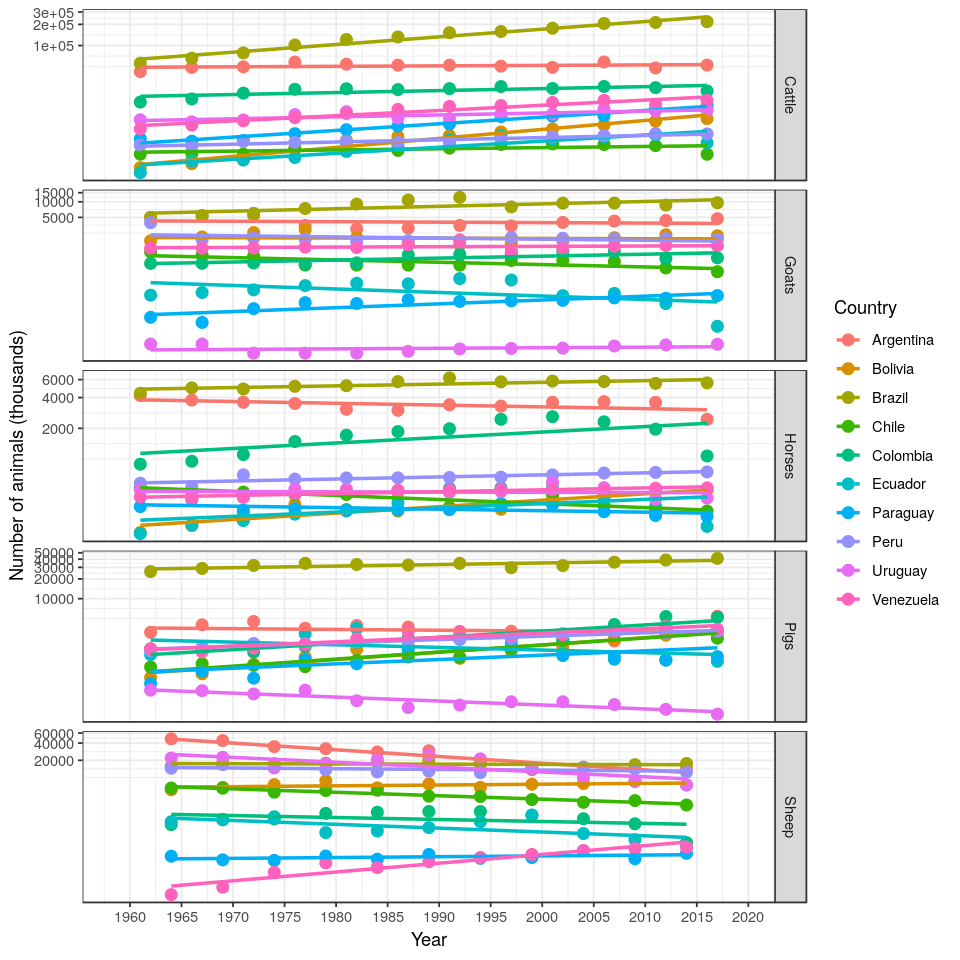

In [26]:
options(repr.plot.width=8, repr.plot.height=8)
q0

### Export data for further analysis

In [21]:
production.country.time <- reshape2::dcast(data = raw.production, formula = Area + Year ~ Item,
                               fun.aggregate = sum, value.var = "Value")

In [ ]:
write.csv(production.country.time,
          file = "../../DATA/TRADE_DATA/livestock_population_South_America.csv",
          row.names = FALSE)

In [24]:
head(production.country.time)

Area,Year,Cattle,Goats,Horses,Pigs,Sheep
Argentina,1961,42520000,5000000,4184000,3787000,50150000
Argentina,1962,42901000,4970000,3966000,3074729,47305408
Argentina,1963,40009120,4980000,3761235,3416559,46157904
Argentina,1964,42300000,4998000,3760000,3400000,47500000
Argentina,1965,46708688,5098000,3760000,3700000,49000000
Argentina,1966,48800000,5200000,3780000,4000000,48500000


In [28]:
production.time <- reshape2::dcast(data = raw.production, formula = Year ~ Item,
                               fun.aggregate = sum, value.var = "Value")

In [30]:
write.csv(production.time,
          file = "../../DATA/TRADE_DATA/livestock_population_South_America_temporalOnly.csv",
          row.names = FALSE)